# Preliminary functions and declaration of the parameters.

In [0]:
import warnings
warnings.filterwarnings("ignore")
#importation of the required packages 

In [2]:
!pip install fipy

     |████████████████████████████████| 727kB 2.8MB/s 
  Created wheel for fipy: filename=FiPy-3.4.1-cp36-none-any.whl size=421818 sha256=d787be60246af8ffc13d6357e504557196e10877e8704582f1683ebf7effc588
  Stored in directory: /root/.cache/pip/wheels/1e/75/80/0814f640811a614a675de4a074d6115691c44e74e9b9413fb2
Successfully built fipy


In [0]:
from fipy import *

In [0]:
p = lambda phi: phi**3 * (6 * phi**2 - 15 * phi + 10)
g = lambda phi: phi**2 * (1 - phi)**2

# #derivatives of prevouis function 
# pp = lambda phi: 30. * g(phi)
# gp = lambda phi: 2. * phi * (1 - phi) * (1 - 2 * phi)

def inter(values):
    """the role of this function is to interpolate every constante"""
    ret = lambda phi: p(phi)*values[0]+(1-p(phi))*values[1]
    return ret

In [0]:
# Lenght in m
# Mass in Kg
# Temperature in K
# Time in s
# Energy in Joule  
# Global data

cp = [4181000,2050000] #J / cm3.K
k = [.6, 2.] 
alpha = [10000.,100.]
d = .01
rb = .01
I0 = 300.
I1 = I0 * numerix.exp(-alpha[1]*d)

#interpolating coefficient 
cp_tild = inter(cp)
k_tild = inter(k)
alpha_tild = inter(alpha)


In [0]:
# other parameter of water
Tm = 273.15 # K  
Lv = 330000000.
beta = .1 #kinetic coefficient changeble
sigma = .033 # J / m**3 #Interfacial energy

# To simulate the evolution of the phase field in 1D run the following cell

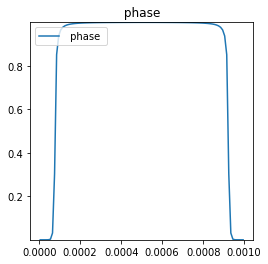

In [11]:
#deltaT = .04
#parameter of the mesh
#L = .4 #cm
L = .001 
nx = 100.
dx = L / nx
mesh = Grid1D(nx=nx, dx=dx)
#mesh = Grid2D(nx=nx, dx=dx, ny=nx, dy=dx)
 
#time step
dt = .001

#Declaration of the phase variable
phase = CellVariable(name=" phase ", mesh=mesh,hasOld=True)

#Initialization of the phase field variable 
phase.setValue(1.)
phase.setValue(0., where= ((mesh.x-L/2)**2 >= L**2/100))


dT = CellVariable(name=" temp ", mesh=mesh,hasOld=True)
dT.setValue(Tm)


delta = 1.5* dx
kappa = 6 * sigma * delta # J / m
W = 3 * sigma / delta # J / m**3
Mphi = Tm * beta / (6. * Lv * delta) # m**3 / (J s)

#definition of the phase field equation
mPhi = -(2*(1 - 2 * phase) * W + 30 * phase * (1 - phase) * Lv * (-dT + Tm) / Tm)
dmPhidPhi = 4 * W - 30 * (1 - 2 * phase) * Lv * (-dT + Tm) / Tm
S1 = dmPhidPhi * phase * (1 - phase) + mPhi * (1 - 2 * phase)
S0 = mPhi * phase * (1 - phase) - S1 * phase
phaseEq = ( TransientTerm(coeff = 1/Mphi, var = phase) == DiffusionTerm(coeff = kappa, var = phase) \
                                                        + S0 + ImplicitSourceTerm(coeff = S1, var = phase) )


#dT.constrain(1,where = mesh.facesLeft)
eqX = (TransientTerm(coeff = cp_tild(phase),var=dT) == DiffusionTerm(coeff = k_tild(phase),var=dT)\
                                                  - (Lv / dt)*(phase - phase.old) \
                                                  + alpha_tild(phase) * I1 * numerix.exp(-((mesh.x-L/2)**2)/rb**2)\
                                                  )

# #dt = .001
eq = phaseEq & eqX

viewer1 = MatplotlibViewer(vars=(phase) )
#viewer2= MatplotlibViewer(vars=(dT) )

for step in range(451):
    phase.updateOld()
    dT.updateOld()
    # res = 1e+10
    # while res > 1e-7:
    #      res = phaseEq.sweep(dt=dt)
    eq.solve(dt=dt)
    #eqX.solve(dt=dt)
    viewer1.plot()

# To simulate the evolution of the temperature in 1D run the following cell

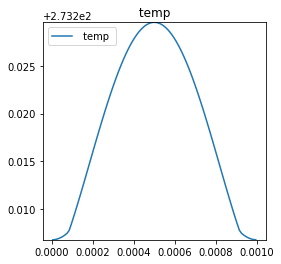

In [10]:
#deltaT = .04
#parameter of the mesh
#L = .4 #cm
L = .001 
nx = 100.
dx = L / nx
mesh = Grid1D(nx=nx, dx=dx)
#mesh = Grid2D(nx=nx, dx=dx, ny=nx, dy=dx)
 
#time step
dt = .001

#Declaration of the phase variable
phase = CellVariable(name=" phase ", mesh=mesh,hasOld=True)

#Initialization of the phase field variable 
phase.setValue(1.)
phase.setValue(0., where= ((mesh.x-L/2)**2 >= L**2/100))


dT = CellVariable(name=" temp ", mesh=mesh,hasOld=True)
dT.setValue(Tm)


delta = 1.5* dx
kappa = 6 * sigma * delta # J / m
W = 3 * sigma / delta # J / m**3
Mphi = Tm * beta / (6. * Lv * delta) # m**3 / (J s)

#definition of the phase field equation
mPhi = -(2*(1 - 2 * phase) * W + 30 * phase * (1 - phase) * Lv * (-dT + Tm) / Tm)
dmPhidPhi = 4 * W - 30 * (1 - 2 * phase) * Lv * (-dT + Tm) / Tm
S1 = dmPhidPhi * phase * (1 - phase) + mPhi * (1 - 2 * phase)
S0 = mPhi * phase * (1 - phase) - S1 * phase
phaseEq = ( TransientTerm(coeff = 1/Mphi, var = phase) == DiffusionTerm(coeff = kappa, var = phase) \
                                                        + S0 + ImplicitSourceTerm(coeff = S1, var = phase) )


#dT.constrain(1,where = mesh.facesLeft)
eqX = (TransientTerm(coeff = cp_tild(phase),var=dT) == DiffusionTerm(coeff = k_tild(phase),var=dT)\
                                                  - (Lv / dt)*(phase - phase.old) \
                                                  + alpha_tild(phase) * I1 * numerix.exp(-((mesh.x-L/2)**2)/rb**2)\
                                                  )

# #dt = .001
eq = phaseEq & eqX

#viewer1 = MatplotlibViewer(vars=(phase) )
viewer2= MatplotlibViewer(vars=(dT) )

for step in range(451):
    phase.updateOld()
    dT.updateOld()
    # res = 1e+10
    # while res > 1e-7:
    #      res = phaseEq.sweep(dt=dt)
    eq.solve(dt=dt)
    #eqX.solve(dt=dt)
    viewer2.plot()